# Stack Academy - Data Science do Zero

# Módulo 10 - Machine Learning em Produção

# 10.3 - Persistência de Objetos em Disco

#### Importando as bibliotecas necessárias

In [38]:
import pickle
import joblib
import numpy as np
import _pickle as cPickle

#### Criação do objeto do tipo lista.

In [39]:
lista = [1500,1234,567,14]

#### Criação do arquivo em disco.

In [40]:
arquivo = open('lista.pkl','wb')

#### Persistindo o objeto em disco.

In [41]:
pickle.dump(lista,arquivo)

# dump: recebe como primeiro parametro o objeto (que fará a persistencia) e segundo parametro o arquivo

In [42]:
arquivo.close()

#### Carregando o objeto a partir do disco para a memória.

In [43]:
arquivo2 = open('lista.pkl','rb') # rb: read binario - leitura

In [44]:
lista2 = pickle.load(arquivo2)

In [45]:
arquivo2.close()

In [46]:
lista2

[1500, 1234, 567, 14]

## Persistindo objetos utilizando o Numpy

#### Definindo o array

In [47]:
x = np.arange(10)

In [48]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Persistindo o array em disco

In [49]:
np.save('array', x) # np.save('NOME_ARQUIVO', OBJETO_ARRAY)

#### Listando os arquivos em disco

In [50]:
!ls

'ls' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


#### Carregando o objeto a partir do disco para a memória.

In [51]:
x2 = np.load('array.npy')

In [52]:
x2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Persistindo a lista criada anteriormente em disco

In [53]:
np.save('lista2.npy',lista2)

#### Carregando o objeto a partir do disco para a memória.

In [54]:
lista3 = np.load('lista2.npy')

In [55]:
lista3

# Apos carregar vemos que a lista foi transformada em um array

array([1500, 1234,  567,   14])

#### Verificando o tipo do objeto criado.

In [56]:
type(lista3)

numpy.ndarray

## Persistindo objetos utilizando o Joblib

#### Persistindo a lista criada anteriormente em disco.

In [57]:
joblib.dump(lista3,'lista3.joblib')

['lista3.joblib']

#### Listando os arquivos em disco

In [58]:
!ls

'ls' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


#### Persistindo a lista criada anteriormente em disco utilizando compressão.

In [59]:
joblib.dump(lista3,'lista3.gz',compress=True)

['lista3.gz']

#### Carregando o objeto a partir do disco para a memória.

In [60]:
lista4 = joblib.load('lista3.gz')

In [61]:
lista4

array([1500, 1234,  567,   14])

# 10.4 - Persistência de Modelo de Mavhine Learning em Disco

In [62]:
import os
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Carregando a base de dados

In [63]:
data = pd.read_csv(r'Módulo 10 - Machine Learning em Produção\notebook-dataset\loan.csv')

In [64]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [66]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [67]:
data2 = data[data.Loan_Status=='Y'].sample(200)

In [68]:
data = data2.append(data[data.Loan_Status=='N'].sample(192))

In [69]:
data.Loan_Status.value_counts()

Y    200
N    192
Name: Loan_Status, dtype: int64

## Checando Missing Values

In [70]:
data2.isnull().sum()

Loan_ID               0
Gender                3
Married               1
Dependents            3
Education             0
Self_Employed         6
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            7
Loan_Amount_Term      6
Credit_History       20
Property_Area         0
Loan_Status           0
dtype: int64

Preechendo Missing Values:

- `Dependents`: Assumindo o valor majoritário da coluna.
- `Self_Employed`: Assumindo o valor majoritário da coluna.
- `Loan_Amount_Term`: Preenchendo com o valor médio da coluna.
- `Credit_History`: Assumindo o valor majoritário da coluna.
- `Married`: Assumindo o valor majoritário da coluna.
- `Gender`: Assumindo o valor majoritário da coluna.

In [71]:
data['Gender'] = data['Gender'].fillna('Male')

In [72]:
data['Married'] = data['Married'].fillna('No')

In [73]:
data['Dependents'] = data['Dependents'].fillna('0')

In [74]:
data['Self_Employed'] = data['Self_Employed'].fillna('No')

In [75]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [76]:
data['Credit_History'] = data['Credit_History'].fillna(1.0)

In [77]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [78]:
data.Credit_History.value_counts()

1.0    308
0.0     84
Name: Credit_History, dtype: int64

### Checando novamente Missing Values

In [79]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Transformando dados categóricos**

Várias colunas do dataframe são categóricas, precisamos transforma-las, são elas: `Gender`, `Married`, `Education`, `Self_Employed` & `Property_Area` columns.

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
gender_values = {'Female' : 0, 'Male' : 1} 
married_values = {'No' : 0, 'Yes' : 1}
education_values = {'Graduate' : 0, 'Not Graduate' : 1}
employed_values = {'No' : 0, 'Yes' : 1}
dependent_values = {'3+': 3, '0': 0, '2': 2, '1': 1}
loan_values = {'Y':1,'N':0}
data.replace({'Gender': gender_values,
                 'Married': married_values, 
                 'Education': education_values,
                 'Self_Employed': employed_values, 
                 'Dependents': dependent_values,
                 'Loan_Status': loan_values
                }, inplace=True)

In [82]:
data.drop(['Loan_ID','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area'],axis=1,inplace=True)

In [83]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Status
303,1,1,1,0,0,1625,96.0,1
224,1,1,0,0,0,6250,128.0,1
470,1,1,1,0,1,3450,162.0,1
391,1,1,3,0,0,9504,275.0,1
240,1,1,2,0,0,5819,120.0,1


### Selecionando o melhor classificador através de Pipeline e GridSearchCV

In [84]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [85]:
pipe_random_forest = Pipeline([
        ('scl', StandardScaler()),
        
        ('clf', RandomForestClassifier())
        ]
)

In [86]:
pipe_svm = Pipeline([
        ('scl', StandardScaler()),
        ('clf', svm.SVC())
        ]
)

In [87]:
pipe_knn = Pipeline([
        ('scl', StandardScaler()),
        ('clf', KNeighborsClassifier())
        ]
)

#### Valores para Grid

In [88]:
valores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [89]:
grid_params_rf = [{
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_leaf': valores,
    'clf__max_depth': valores,
    'clf__min_samples_split': valores[1:]
}]

In [90]:
grid_params_svm = [{
    'clf__kernel': ['linear', 'rbf'], 
    'clf__C': valores
}]

In [91]:
grid_params_knn = [{
    'clf__n_neighbors': valores,
}]

#### Construindo GridSearch

In [92]:
gs_rf = GridSearchCV(
    estimator=pipe_random_forest,
    param_grid=grid_params_rf,
    scoring='accuracy',
    cv=10 
)

In [93]:
gs_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=grid_params_svm,
    scoring='accuracy',
    cv=10,
)

In [94]:
gs_knn = GridSearchCV(
    estimator=pipe_knn,
    param_grid=grid_params_knn,
    scoring='accuracy',
    cv=10,
)

In [95]:
X_train = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

#### Computando o GridSearch para Random Forest

In [101]:
gs_rf.fit(X_train,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', RandomForestClassifier())]),
             param_grid=[{'clf__criterion': ['gini', 'entropy'],
                          'clf__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10],
                          'clf__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9,
                                                     10]}],
             scoring='accuracy')

#### Melhores parametros e scoring

In [102]:
print('Melhores parâmetros: %s' % gs_rf.best_params_)
print('Melhores Acurácia: %.3f' % gs_rf.best_score_)

Melhores parâmetros: {'clf__criterion': 'gini', 'clf__max_depth': 7, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Melhores Acurácia: 0.576


#### Computando o GridSearch para SVM

In [97]:
gs_svm.fit(X_train,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid=[{'clf__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'clf__kernel': ['linear', 'rbf']}],
             scoring='accuracy')

#### Melhores parametros e scoring

In [98]:
print('Melhores parâmetros: %s' % gs_svm.best_params_)
print('Melhores Acurácia: %.3f' % gs_svm.best_score_)

Melhores parâmetros: {'clf__C': 6, 'clf__kernel': 'rbf'}
Melhores Acurácia: 0.576


#### Computando o GridSearch para KNN

In [99]:
gs_knn.fit(X_train,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid=[{'clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             scoring='accuracy')

#### Melhores parametros e scoring

In [100]:
print('Melhores parâmetros: %s' % gs_knn.best_params_)
print('Melhores Acurácia: %.3f' % gs_knn.best_score_)

Melhores parâmetros: {'clf__n_neighbors': 5}
Melhores Acurácia: 0.520


### Métricas de Validação

In [103]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [104]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_train, y)

In [105]:
print (pd.crosstab(y_teste, gs_rf.predict(X_teste), rownames=['Real'], colnames=['Predito'], margins=True), '')

Predito   0   1  All
Real                
0        35   8   43
1         5  50   55
All      40  58   98 


In [106]:
print (metrics.classification_report(y_teste,gs_rf.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        43
           1       0.86      0.91      0.88        55

    accuracy                           0.87        98
   macro avg       0.87      0.86      0.86        98
weighted avg       0.87      0.87      0.87        98



## Persistindo o modelo de Machine Learning para o disco

In [107]:
import joblib

#### Persistindo o melhor modelo em disco

In [108]:
joblib.dump(gs_rf, 'model.pkl')

['model.pkl']

#### Listando os arquivos em disco.

In [ ]:
!ls

#### Carregando o modelo a partir do disco para a memória

In [110]:
model = joblib.load('model.pkl')

In [111]:
print("Atributos do Modelo:\n\nClasses:{}\nEstimator:{}".format(model.classes_,model.estimator))

Atributos do Modelo:

Classes:[0 1]
Estimator:Pipeline(steps=[('scl', StandardScaler()), ('clf', RandomForestClassifier())])


**Verificando o Dataset final gerado.**

In [112]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount
303,1,1,1,0,0,1625,96.0
224,1,1,0,0,0,6250,128.0
470,1,1,1,0,1,3450,162.0
391,1,1,3,0,0,9504,275.0
240,1,1,2,0,0,5819,120.0


**Teste de Classificação.**

In [113]:
teste = np.array([[1,1,3,0,0,9504,275.0]])

In [114]:
model.predict(teste)

array([1], dtype=int64)

**Probabilidades de Classes.**

In [115]:
model.predict_proba(teste)

array([[0.2751401, 0.7248599]])

# 10.6 - Desenvolvendo uma Web API utilizando o Microframework Flask

Aplicação está no diretório "api" com as pastas: "__pycache__", "model", "static" e "templates".<BR>
Executável: srv.py

In [ ]:
import numpy as np
import os
from flask import Flask, request, render_template, make_response
import joblib

app = Flask(__name__, static_url_path='/static')
model = joblib.load('model/model.pkl')


@app.route('/')
def display_gui():
    return render_template('template.html')

@app.route('/verificar', methods=['POST'])
def verificar():
	sexo = request.form['gridRadiosSexo']
	dependentes = request.form['dependentes']
	casado = request.form['gridRadiosCasado']
	trabalho_conta_propria = request.form['gridRadiosTrabalhoProprio']
	rendimento = request.form['rendimento']
	educacao = request.form['educacao']
	valoremprestimo = request.form['valoremprestimo']
	teste = np.array([[sexo,casado,dependentes,educacao,trabalho_conta_propria,rendimento,valoremprestimo]])
	
	print(":::::: Dados de Teste ::::::")
	print("Sexo: {}".format(sexo))
	print("Numero de Dependentes: {}".format(dependentes))
	print("Casado: {}".format(casado))
	print("Educacao: {}".format(educacao))
	print("Trabalha por conta propria: {}".format(trabalho_conta_propria))
	print("Rendimento: {}".format(rendimento))
	print("Valor do emprestimo: {}".format(valoremprestimo))
	print("\n")

	classe = model.predict(teste)[0]
	print("Classe Predita: {}".format(str(classe)))

	return render_template('template.html',classe=str(classe))

if __name__ == "__main__":
        port = int(os.environ.get('PORT', 5500))
        app.run(host='0.0.0.0', port=port)

# 10.11 - Exportando o Resultado do Modelo (a ser usado no PowerBI)

## **Análise de Sentimentos usando Machine Learning**

* Criando modelos para análise de sentimentos de tweets
* Teste com Modelo usando tag de negações
* Teste com Modelo usando Bigrams

In [116]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

**Ler arquivo de dados e conta a quantidade de linhas**

In [118]:
dataset = pd.read_csv(r'Módulo 08 - Mineração de Textos e Natural Language Processing\materiais_de_apoio\Tweets_Mg.csv', encoding='utf-8')

**Exibe as 50 primeiras lihas de tweets**

In [120]:
dataset.Text.head(10)

0    ���⛪ @ Catedral de Santo Antônio - Governador ...
1    � @ Governador Valadares, Minas Gerais https:/...
2    �� @ Governador Valadares, Minas Gerais https:...
3                          ��� https://t.co/BnDsO34qK0
4    ��� PSOL vai questionar aumento de vereadores ...
5    " bom é bandido morto"\nDeputado Cabo Júlio é ...
6    "..E 25% dos mineiros dizem não torcer para ti...
7    "A gigantesca barba do mal" em destaque no cad...
8    "BB e governo de Minas travam disputa sobre de...
9    "com vcs bh fica pequena!" Belo Horizonte (pro...
Name: Text, dtype: object

**Conta a quantidade de linhas de tweets neutros, positivos e negativos**

In [121]:
dataset[dataset.Classificacao=='Neutro'].count()

Unnamed: 0                   2453
Created At                   2453
Text                         2453
Geo Coordinates.latitude      102
Geo Coordinates.longitude     102
User Location                1712
Username                     2453
User Screen Name             2453
Retweet Count                2453
Classificacao                2453
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [122]:
dataset[dataset.Classificacao=='Positivo'].count()

Unnamed: 0                   3300
Created At                   3300
Text                         3300
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                2118
Username                     3300
User Screen Name             3300
Retweet Count                3300
Classificacao                3300
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [123]:
dataset[dataset.Classificacao=='Negativo'].count()

Unnamed: 0                   2446
Created At                   2446
Text                         2446
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                1659
Username                     2446
User Screen Name             2446
Retweet Count                2446
Classificacao                2446
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

<AxesSubplot:>

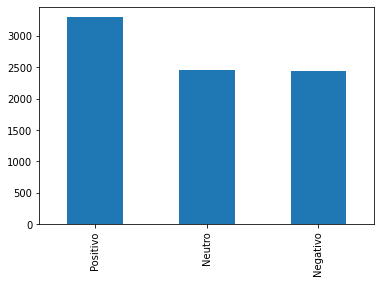

In [124]:
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar')

In [125]:
dataset.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

## Pre-Processamento dos Dados

* Remove linhas duplicadas na base de dados
    - Problema na coleta dos dados.
* Remove Stopwords
* Faz Stemming nos dados
* Remove caracteres indesejados como links, pontuação etc.

In [126]:
dataset.drop_duplicates(['Text'], inplace=True)

In [127]:
dataset.Text.count()

5765

## **Separando tweets e suas Classes**

In [128]:
tweets = dataset['Text']
classes = dataset['Classificacao']

**Instala bibliotecas e baixa a base de dados**

In [129]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


True

**Funções de Pre-processamento de dados**

In [130]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [131]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [132]:
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

**Entenda como funciona cada função**

In [133]:
RemoveStopWords('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'Eu gosto partido, votaria novamente nesse governante!'

In [134]:
Stemming('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'eu não gost do partido, e também não vot nov ness governante!'

In [135]:
Limpeza_dados('Assita aqui o video do Governador falando sobre a CEMIG https://www.uol.com.br :) ;)')

'assita aqui o video do governador falando sobre a cemig   '

**Aplica as 3 funções de Pre-processamento nos dados**

In [136]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in tweets]

In [137]:
Preprocessing('Eu não gosto do partido, e também não votaria novamente nesse governante. Assita o video aqui https:// :)')

'gost partido, vot nov ness govern assit vide aqu'

**Visualize os dados e veja como ficou após o pré-processamento**

In [138]:
tweets[:50]

['���⛪ @ catedr sant antôni govern valadares/mg',
 '� @ govern valadares, min geral',
 '�� @ govern valadares, min geral',
 '���',
 '��� psol vai quest aument vere prefeit bh justiç poli est min',
 '" bom band morto" deput cab júli conden fic ineleg 10 ano poli est min',
 '"e 25% min diz torc tim nenhum,mesm dentr est atléticomg cruz pq?"',
 '"a gigantesc barb mal" destaqu cadern cult est min',
 '"bb govern min tr disput sobr depósit judiciais"',
 '"com vc bh fic pequena!" bel horizont (pron [bɛloɾiˈzõntʃi][10] capit est mg, áre aproximad 331 km²',
 '"daí gent visit govern valadares" "qu lug eh mãe?" "mg, gent um parent la" man ond q parent',
 '"é bonit bonita" #latergr #ibiturun #hom @ govern valadares, min geral',
 '"err desconhecido" mato! aliás, secret estad fazend tá assim mg precis dinh não, governador?',
 '"la la land cant estações" arras glob our est min',
 '"la la land cant estações" arras glob our est min',
 '"lo abusos, aun en el est má sólido, son min sord tard tempr estall

## Criando o modelo

**Instancia o objeto que faz a vetorização dos dados de texto**

In [139]:
vectorizer = CountVectorizer(analyzer="word")

**Aplica o vetorizador nos dados de texto**

In [140]:
freq_tweets = vectorizer.fit_transform(tweets)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [141]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

**Formato (Linhas, Colunas) da matriz**

In [142]:
freq_tweets.shape

(5765, 5903)

**Matriz**

In [143]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Testando o modelo com algumas instâncias simples**

In [144]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

**Aplica a função de Pré-processamento nos dados**

In [145]:
testes = [Preprocessing(i) for i in testes]

In [146]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)

In [147]:
# Fazendo a classificação com o modelo treinado.
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

govern início, vam ver vai dar, Neutro
feliz govern min ano, Neutro
est min geral decret calam financeira!!!, Negativo
seguranç dess país deix desej, Neutro
govern min vez pt, Negativo


In [148]:
# Probabilidades de cada classe
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.12, 0.88, 0.  ],
       [0.02, 0.96, 0.02],
       [1.  , 0.  , 0.  ],
       [0.01, 0.98, 0.01],
       [0.67, 0.32, 0.  ]])

## **Função de Tags de Negações**

* Acrescenta uma tag _NEG encontrada após um 'não'.
* Objetivo é dar mais peso para o modelo identificar uma inversão de sentimento da frase.
* Exemplos: 
    - Eu gosto de cachorros, positivo.
    - Eu **não** gosto de cachorros, negativo.

In [149]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return (" ".join(resultado))

**Exemplos de utilização da tag de negações**

In [150]:
marque_negacao('Eu gosto do partido, votaria novamente nesse governante!')

'eu gosto do partido, votaria novamente nesse governante!'

In [151]:
marque_negacao('Eu Não gosto do partido, e também não votaria novamente nesse governante!')

'eu não gosto_NEG do_NEG partido,_NEG e_NEG também_NEG não_NEG votaria_NEG novamente_NEG nesse_NEG governante!_NEG'

## **Criando modelos com Pipelines**

* Pipelines são interessantes para reduzir código e automatizar fluxos

In [152]:
from sklearn.pipeline import Pipeline

In [153]:
pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

* Pipeline que atribui tag de negacoes nas palavras

In [154]:
pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

In [155]:
pipeline_simples.fit(tweets,classes)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [156]:
pipeline_simples.steps

[('counts', CountVectorizer()), ('classifier', MultinomialNB())]

## Separando dados de treino e teste

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(tweets, classes, test_size=0.33)

#### Gera modelo com os dados de treino

In [161]:
pipeline_simples.fit(X_train, y_train)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

#### Gera uma data ficticia para compor os nossos dados

In [162]:
data=pd.date_range(start='1/1/2014',periods=len(X_test))

In [163]:
data

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-16',
               '2019-03-17', '2019-03-18'],
              dtype='datetime64[ns]', length=1903, freq='D')

#### Cria um DataFrame com os resultados de classificação do modelo

In [164]:
df = pd.DataFrame({'tweets': X_test, 'classificacao': pipeline_simples.predict(X_test),'data': data})

####  Visualizando o dataframe gerado

In [165]:
df

,tweets,classificacao,data
0,jova diz mai rasg constitu reg intern est min,Neutro,2014-01-01
1,@folh lix petist quebr est min geral vez! lug,Negativo,2014-01-02
2,#timbet #glob process design profes estad min ...,Positivo,2014-01-03
3,bb avis justiç govern mg recurs cont judic by ...,Negativo,2014-01-04
4,"rt @realsociedad � zaldu ""la afición ha est 10...",Neutro,2014-01-05
...,...,...,...
1898,rt @marcjm algum dúv govern ser afast b brasil...,Negativo,2019-03-14
1899,"rt @caduloren assim pt mg pi, psdb corrupt @ma...",Negativo,2019-03-15
1900,caval emoc desped don enterr nacion est min,Neutro,2019-03-16
1901,contrat profes começ nest terçaf juiz #operaçã...,Positivo,2019-03-17


#### Exporta o dataframe para o disco (arquivo .csv)

In [166]:
df.to_csv(r'Módulo 08 - Mineração de Textos e Natural Language Processing\materiais_de_apoio\resultado_classificacao_tweets.csv', sep=',', index=False)